In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Load the dataset
df = pd.read_csv('mushroom.csv')

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1)

# One-Hot Encode the categorical variables
df_encoded = pd.get_dummies(df.drop('class', axis=1))  # Exclude 'class' from encoding
df_encoded['class'] = df['class']  # Add 'class' back to the encoded dataframe

# Convert target labels to integer encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_encoded['class'])

C:\Users\janani\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Split the data into features and labels
X = df_encoded.drop(['class'], axis=1)
y = y_encoded

# Split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Implement a basic SVM
svm_model = SVC(kernel='rbf')  # You can experiment with other kernels
svm_model.fit(X_train, y_train)

SVC()

In [4]:
# Evaluate model performance
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

Accuracy: 0.6675


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


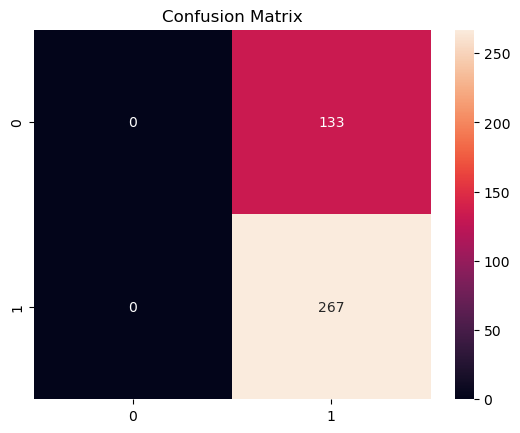

In [5]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.show()

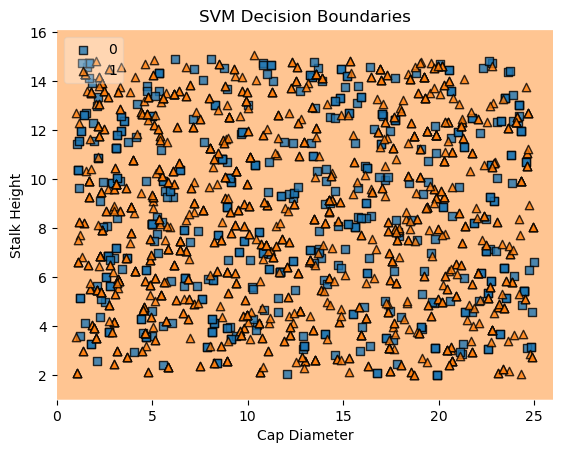

In [7]:
# taken two features for visualization purposes
X_vis = X_train[['cap_diameter', 'stalk_height']].values
y_vis = y_train

svm_model_vis = SVC(kernel='rbf').fit(X_vis, y_vis)
plot_decision_regions(X_vis, y_vis, clf=svm_model_vis, legend=2)

plt.xlabel('Cap Diameter')
plt.ylabel('Stalk Height')
plt.title('SVM Decision Boundaries')
plt.show()

In [9]:
# Grid search for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.8s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.7s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ...................

In [10]:
# Evaluate the optimized model
y_pred_optimized = best_model.predict(X_test)
print(classification_report(y_test, y_pred_optimized))



              precision    recall  f1-score   support

           0       0.99      0.66      0.79       133
           1       0.86      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.92      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400



In [11]:
# Compare different SVM kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm_model_kernel = SVC(kernel=kernel)
    svm_model_kernel.fit(X_train, y_train)
    y_pred_kernel = svm_model_kernel.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred_kernel))
    print(classification_report(y_test, y_pred_kernel))
    print("\n")

Kernel: linear
Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400





C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kernel: poly
Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400





C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kernel: rbf
Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400





C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kernel: sigmoid
Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.36      0.30      0.33       133
           1       0.68      0.73      0.71       267

    accuracy                           0.59       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.57      0.59      0.58       400





In [ ]:

Strengths:

Handles High-Dimensional Data: SVM is effective in managing many features, which is ideal for the Mushroom dataset with its numerous categorical variables.

Robust to Overfitting: With proper margin setting, SVM can avoid overfitting, ensuring better generalization on unseen data.

Non-linear Boundaries: SVM can model complex, non-linear relationships using kernels like RBF, capturing intricate patterns in the dataset.

Weaknesses:

Computationally Intensive: Training SVM, especially with large datasets or complex kernels, can be slow and resource-heavy.

Parameter Sensitivity: The models performance heavily depends on the right choice of kernel and hyperparameters, which can be challenging to tune.

Interpretability: SVMs, particularly with non-linear kernels, are difficult to interpret, making it hard to explain how decisions are made.

Practical Implications of SVM in Real-World Tasks

Binary Classification: SVM is highly effective for binary tasks, like identifying edible vs. poisonous mushrooms, and is widely used in fields like spam detection and disease diagnosis.

High-Dimensional Data: SVM excels in scenarios with many features, such as text classification or bioinformatics.

Computational Considerations: In large-scale applications, SVMs computational demands can be a limitation, making it less suitable for real-time tasks without optimization.

Class Imbalance: SVM may struggle with imbalanced datasets, necessitating techniques like class weighting or oversampling to maintain performance.

Overall, SVM is a powerful tool when applied to the right problems but requires careful tuning and consideration of computational resources.

Conclusion: 
    Linear Kernel: Performs best with high accuracy and balanced metrics.

    Polynomial, RBF, and Sigmoid Kernels: All have lower accuracy and similar performance issues. 
        
        These kernels seem to struggle with the current dataset, especially with class 0.
Choice of Kernel: The linear kernel is preferred in this case due to its superior performance.